In [207]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns    
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error   
from sklearn import preprocessing  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [208]:
df = pd.read_excel(r"C:\Users\abhin\Downloads\marketing_campaign.xlsx")

In [209]:
df = pd.DataFrame(df)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [210]:
df.shape

(2240, 29)

In [211]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [212]:
df=df.drop(['AcceptedCmp1','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis= 1)

In [213]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,80,30,61,2,6,5,10,3,0,0


In [214]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [216]:
print('sum of duplicated values: {}'.format(df.duplicated().sum()))

sum of duplicated values: 0


In [217]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64


In [218]:
df = df.dropna()

In [219]:
df.shape

(2216, 21)

In [220]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64


In [221]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,0.034154,-0.021491
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,-0.030407,0.023692
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.027225,0.133047
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.040978,-0.077909
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,0.003307,-0.153901
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,0.013637,-0.199766
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,-0.039470,0.246299
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,-0.005324,0.122443
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,-0.023782,0.237746
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.021220,0.108145


In [222]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

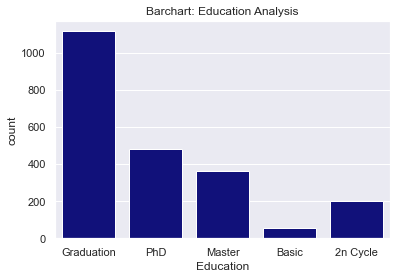

<Figure size 1728x1728 with 0 Axes>

In [223]:
sns.countplot(x ='Education', data = df, color = "darkblue")
plt.title("Barchart: Education Analysis")
plt.figure(figsize=(24, 24))
# Show the plot
plt.show()

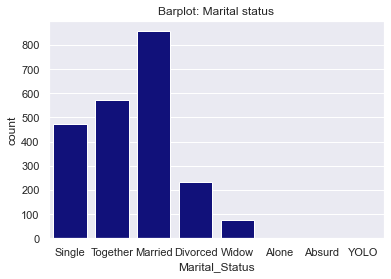

<Figure size 1728x1728 with 0 Axes>

In [224]:
sns.countplot(x ='Marital_Status', data = df, color = "darkblue")
plt.title("Barplot: Marital status")
plt.figure(figsize=(24, 24))
# Show the plot
plt.show()

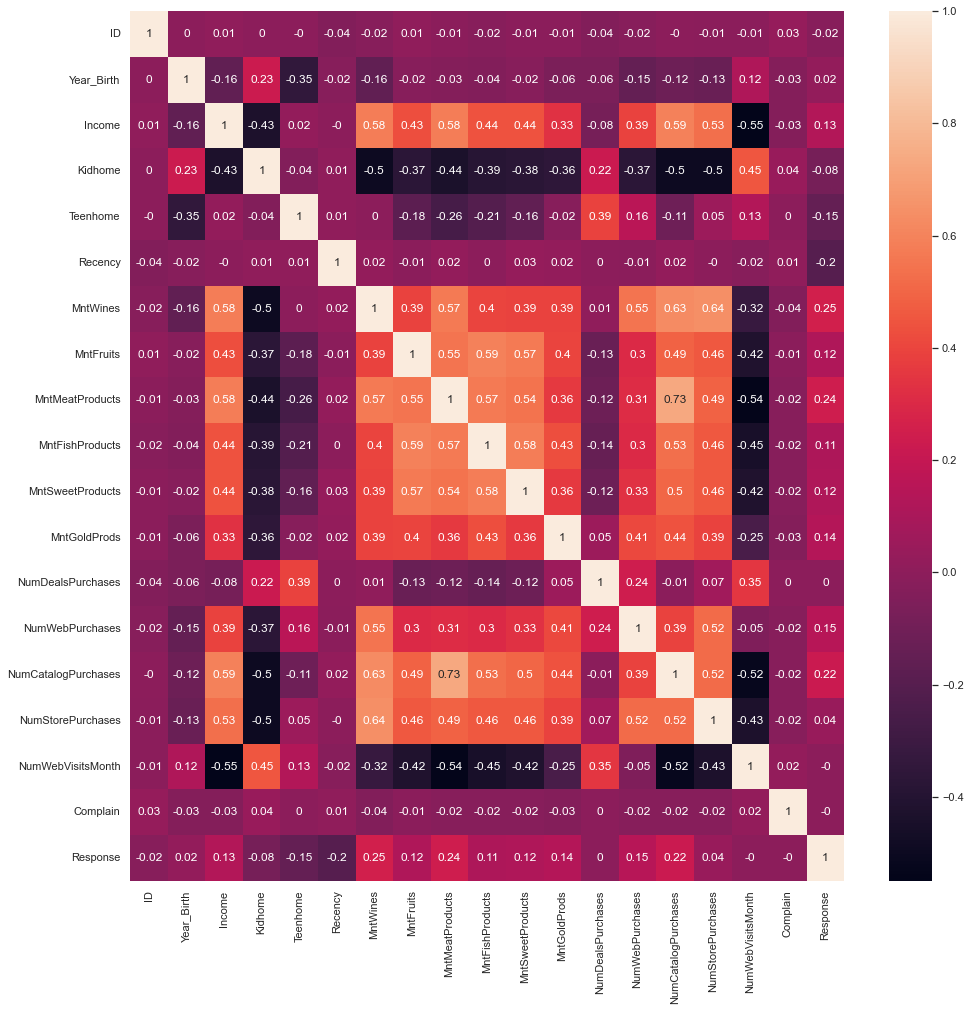

In [175]:
plt.figure(figsize=[16,16])
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, color = "Blue")
plt.show()

In [225]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,80,30,61,2,6,5,10,3,0,0


In [226]:
df_new =pd.get_dummies(df,columns=['Education','Marital_Status'])

In [227]:
df_new

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,1,0,0,0,0,0,0,1,0,0


In [228]:
df_new["Response"].value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [229]:
v = sm.tools.add_constant(df_new) 
temp = pd.Series([variance_inflation_factor(v.values,i) for i in range(v.shape[1])], index=v.columns)
temp

const                      0.000000
ID                         1.011997
Year_Birth                 1.295715
Income                     2.220688
Kidhome                    1.888144
Teenhome                   1.623318
Recency                    1.066089
MntWines                   2.818380
MntFruits                  1.950083
MntMeatProducts            3.042361
MntFishProducts            2.134381
MntSweetProducts           1.933877
MntGoldProds               1.526423
NumDealsPurchases          1.648197
NumWebPurchases            1.976609
NumCatalogPurchases        3.040296
NumStorePurchases          2.407809
NumWebVisitsMonth          2.336202
Complain                   1.012236
Response                   1.267389
Education_2n Cycle              inf
Education_Basic                 inf
Education_Graduation            inf
Education_Master                inf
Education_PhD                   inf
Marital_Status_Absurd           inf
Marital_Status_Alone            inf
Marital_Status_Divorced     

In [230]:
df_log = df_new.drop(['Education_Basic','Marital_Status_YOLO', 'Marital_Status_Alone'],axis=1)
t = sm.tools.add_constant(df_log)
temp1 = pd.Series([variance_inflation_factor(t.values,i) for i in range(t.shape[1])],index=t.columns)
temp1

const                      35823.524818
ID                             1.011521
Year_Birth                     1.295510
Income                         2.220625
Kidhome                        1.882256
Teenhome                       1.623315
Recency                        1.065764
MntWines                       2.817957
MntFruits                      1.950075
MntMeatProducts                3.042217
MntFishProducts                2.134380
MntSweetProducts               1.933861
MntGoldProds                   1.526407
NumDealsPurchases              1.647628
NumWebPurchases                1.976530
NumCatalogPurchases            3.039984
NumStorePurchases              2.407726
NumWebVisitsMonth              2.334820
Complain                       1.012227
Response                       1.267362
Education_2n Cycle             4.461365
Education_Graduation          11.497860
Education_Master               6.982023
Education_PhD                  8.562425
Marital_Status_Absurd          1.431375


In [231]:
df_log = df_new.drop(['Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together'
                   ,'Marital_Status_Widow', 'Education_Graduation'],axis=1)
t1 = sm.tools.add_constant(df_log)
temp1 = pd.Series([variance_inflation_factor(t1.values,i) for i in range(t1.shape[1])],index=t1.columns)
temp1

const                    33948.826278
ID                           1.010862
Year_Birth                   1.255507
Income                       2.218721
Kidhome                      1.885455
Teenhome                     1.622253
Recency                      1.064179
MntWines                     2.815099
MntFruits                    1.948426
MntMeatProducts              3.033888
MntFishProducts              2.130558
MntSweetProducts             1.930225
MntGoldProds                 1.525754
NumDealsPurchases            1.647513
NumWebPurchases              1.975800
NumCatalogPurchases          3.038325
NumStorePurchases            2.405122
NumWebVisitsMonth            2.335345
Complain                     1.011320
Response                     1.238013
Education_2n Cycle           1.094549
Education_Basic              1.091395
Education_Master             1.156941
Education_PhD                1.266526
Marital_Status_Absurd        1.026441
Marital_Status_Alone         1.005793
Marital_Stat

In [150]:
df_log

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Complain,Response,Education_2n Cycle,Education_Basic,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,1,0,0,0,0,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,0,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,0,0,1,0,0,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,6,0,0,0,0,0,0,0,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,1,0,0,0,0


In [183]:
df_log.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Complain,Response,Education_2n Cycle,Education_Basic,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,0.034154,-0.021491,-0.003373,-0.009338,-0.029753,0.004366,0.004285,-0.032414,0.002074
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,-0.030407,0.023692,0.084365,0.113986,-0.069390,-0.122011,0.015500,0.012842,0.010483
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.027225,0.133047,-0.057745,-0.200576,0.011827,0.081552,0.024026,-0.012374,-0.004556
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.040978,-0.077909,0.019489,0.055306,0.013027,-0.043844,-0.024737,0.038289,-0.024737
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,0.003307,-0.153901,-0.055238,-0.119919,0.023532,0.092342,-0.027921,0.010913,0.027323
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,0.013637,-0.199766,-0.005470,-0.003103,-0.026004,-0.008248,0.004141,-0.023763,-0.047783
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,-0.039470,0.246299,-0.097359,-0.139577,0.036722,0.159450,0.004492,-0.013147,0.001507
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,-0.005324,0.122443,0.023782,-0.060559,-0.055592,-0.082192,0.043925,-0.020689,-0.017644
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,-0.023782,0.237746,-0.044831,-0.109634,-0.008071,0.006439,0.019503,-0.023097,-0.015682
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.021220,0.108145,0.059855,-0.059423,-0.049846,-0.103501,0.092167,-0.020159,-0.018469


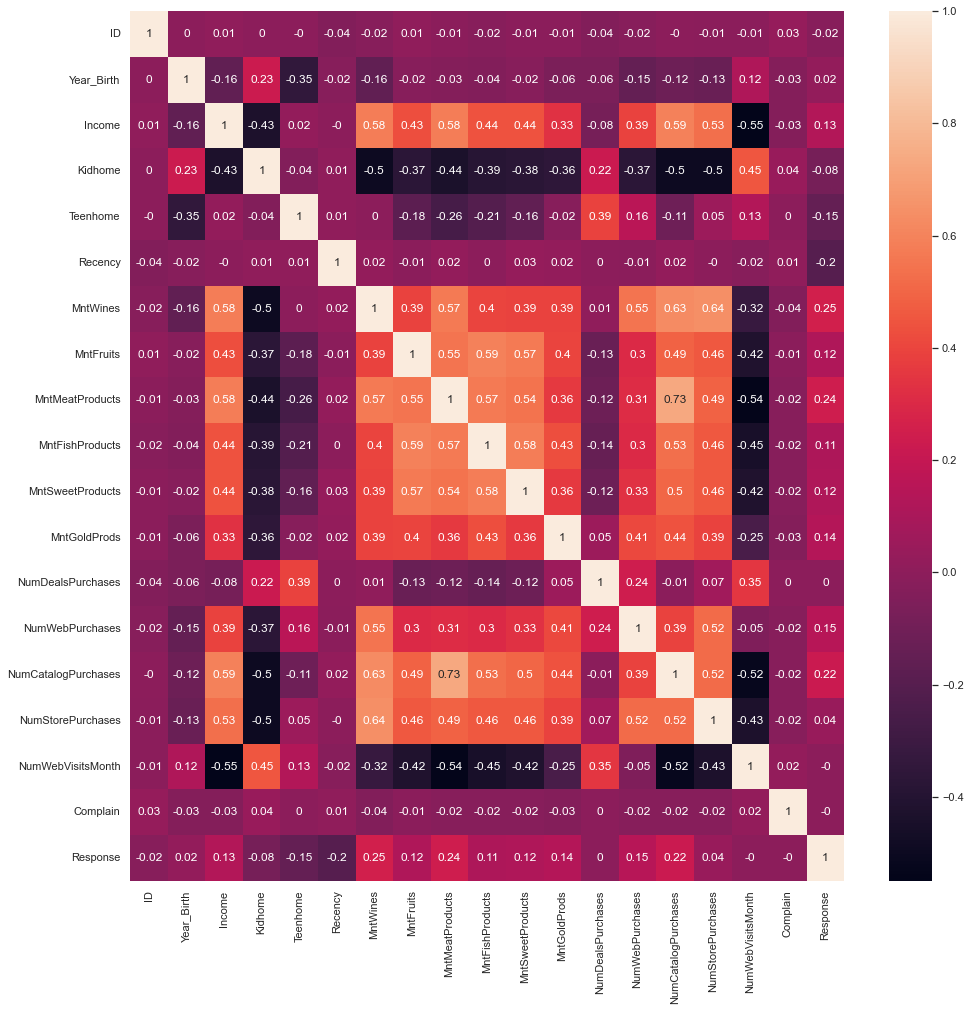

In [185]:
plt.figure(figsize=[16,16])
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, color = "Blue")

plt.show()

# Logistic Regresion

In [186]:
y = df_log[['Response']]
x = df_log.drop('Response',axis=1)

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=123)
x_train.shape, x_test.shape

((1772, 25), (444, 25))

In [189]:
logreg1 = LogisticRegression()
logreg1.fit(x_train, y_train)

y_pred = logreg1.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [190]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.6875
Recall: 0.16923076923076924


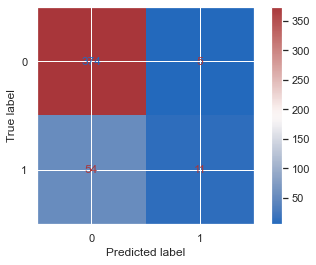

In [204]:
from sklearn.metrics import plot_confusion_matrix
logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,y_train)
plot_confusion_matrix(logistic_regression, x_test, y_test, cmap ='vlag')  
plt.show()

In [192]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train,y_train)
svm_pred = SVM.predict(x_test)

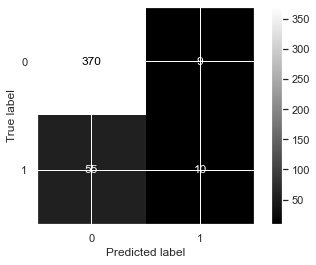

In [206]:
plot_confusion_matrix(SVM,x_test,y_test,cmap='gray')

In [194]:
SVM.score(x_test, y_test)

0.8558558558558559

In [195]:
print("Precision:",metrics.precision_score(y_test,svm_pred))
print("Recall:",metrics.recall_score(y_test,svm_pred))

Precision: 0.5263157894736842
Recall: 0.15384615384615385
